In [1]:
# Use black formatter
# %load_ext lab_black

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

#### Ejecicio:    Normalización
1. Conseguir un dataset para regresión.
2. Armar un código que permita generar múltiples estimadores con diferentes muestras aleatorias de datos.
3. Graficar todas las funciones.

Datasets:

https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

http://archive.ics.uci.edu/ml/datasets.php

1.

In [2]:
n_samples = 300

f = lambda x: x * np.sin(x) + 3

X = np.random.uniform(low=-10, high=10, size=n_samples)
y = f(X) + np.random.normal(0, 1, n_samples)
X[:5], y[:5]

(array([ 5.68944726, -0.0473733 ,  4.28634989,  0.99588428,  8.72032714]),
 array([-0.0666831 ,  2.27361938, -0.8303229 ,  5.04555565,  9.35089958]))

2.

In [3]:
class Model:
    """
    Abstract class for models
    """

    def __init__(self):
        self.model = None


class LinearRegression(Model):
    """
    Class for Linear Regression Model
    """

    def __init__(self):
        self.model = SklearnLinearRegression()

    def fit(self, X, y):
        return self.model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

    def predict(self, X):
        return self.model.predict(X.reshape(-1, 1))


class PolynomialRegression(Model):
    """
    Class for Linear Regression with Bias Model
    """

    def __init__(self, deg=2):
        self.deg = deg

    def fit(self, X, y):
        self.model = np.polyfit(X, y, self.deg).reshape(1, -1)

    def predict(self, X):
        X_extended = np.vander(X, self.model.shape[1])
        return (self.model @ X_extended.T).reshape(-1)

3. Estimadores con sub-datasets de 50 muestras

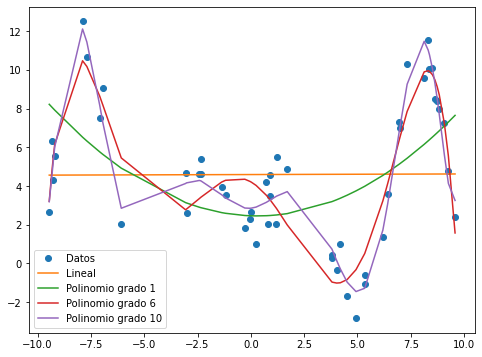

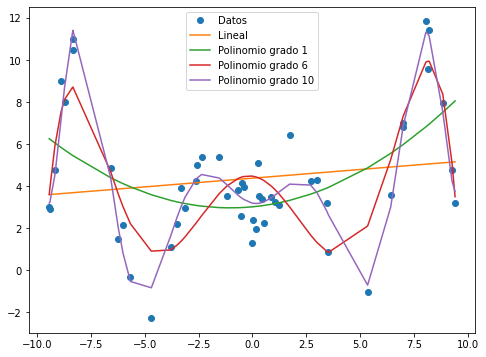

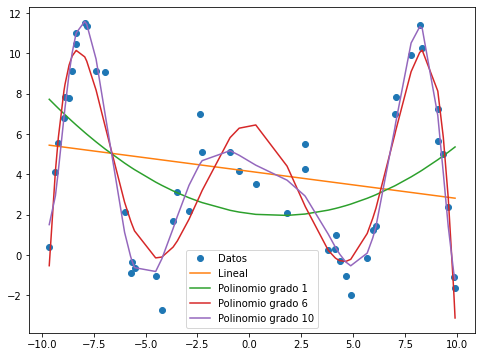

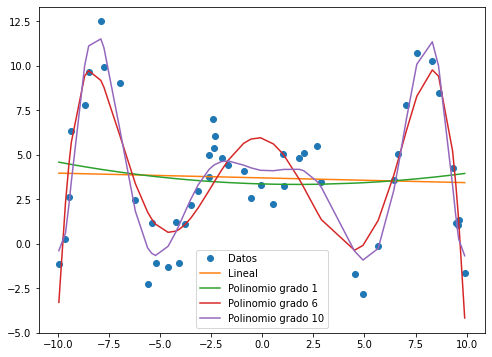

In [4]:
estimators = {
    "Lineal": LinearRegression(),
    "Polinomio grado 1": PolynomialRegression(2),
    "Polinomio grado 6": PolynomialRegression(6),
    "Polinomio grado 10": PolynomialRegression(10),
}

for i in range(4):
    index = np.random.choice(X.shape[0], 50, replace=False)

    sub_X = np.array(X[index])
    sub_y = np.array(y[index])

    plt.figure(figsize=(8, 6))
    plt.plot(sub_X, sub_y, "o", label="Datos")

    sorted_args = sub_X.argsort()
    sub_X = np.array(sub_X[sorted_args])
    sub_y = np.array(sub_y[sorted_args])

    for label, estimator in estimators.items():
        estimator.fit(sub_X, sub_y)
        y_predict = estimator.predict(sub_X)

        plt.plot(sub_X, y_predict, label=label)

    plt.legend()
    plt.show()

Estimadores con todas las muestras del dataset

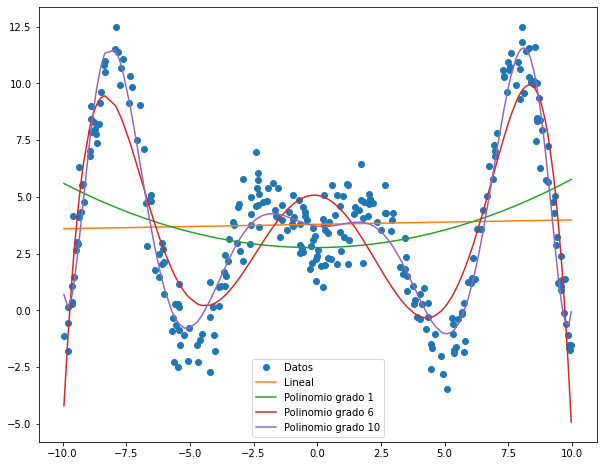

In [5]:
estimators = {
    "Lineal": LinearRegression(),
    "Polinomio grado 1": PolynomialRegression(2),
    "Polinomio grado 6": PolynomialRegression(6),
    "Polinomio grado 10": PolynomialRegression(10),
}

sorted_X = np.array(X[X.argsort()])
sorted_y = np.array(y[X.argsort()])

plt.figure(figsize=(10, 8))
plt.plot(sorted_X, sorted_y, "o", label="Datos")

for label, estimator in estimators.items():
    estimator.fit(sorted_X, sorted_y)
    y_predict = estimator.predict(sorted_X)

    plt.plot(sorted_X, y_predict, label=label)

plt.legend()
plt.show()